[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/masadcv/FastGeodis/blob/master/samples/simpledemo2d.ipynb)

In [3]:
! pip install FastGeodis

In [4]:
import os

import FastGeodis
import matplotlib.pyplot as plt
import numpy as np
import torch
import wget
from PIL import Image


In [5]:
# read images from local path or download from github repo (for colab)
image_path = "../data/img2d.png"

if not os.path.exists(os.path.dirname(image_path)):
    os.makedirs(os.path.dirname(image_path), exist_ok=True)

url = "https://raw.githubusercontent.com/masadcv/FastGeodis/master/data/"
wget.download(os.path.join(url, image_path), image_path) if not os.path.exists(image_path) else None

! ls ../data

brain.png	     brain_seg.png  img3d.nii.gz
brain_seg_noisy.png  img2d.png	    ISIC_546.jpg


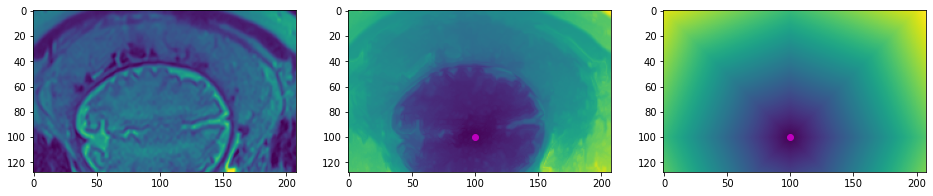

In [10]:


device = "cuda" if torch.cuda.is_available else "cpu"
image = np.asarray(Image.open("../data/img2d.png"), np.float32)

image_pt = torch.from_numpy(image).unsqueeze_(0).unsqueeze_(0)
image_pt = image_pt.to(device)
mask_pt = torch.ones_like(image_pt)
mask_pt[..., 100, 100] = 0

v = 1e10
iterations = 2

lamb = 1.0 # <-- Geodesic distance transform
geodesic_dist = FastGeodis.generalised_geodesic2d(
    image_pt, mask_pt, v, lamb, iterations
)
geodesic_dist = np.squeeze(geodesic_dist.cpu().numpy())

lamb=0.0 # <-- Euclidean distance transform
euclidean_dist = FastGeodis.generalised_geodesic2d(
    image_pt, mask_pt, v, lamb, iterations
)
euclidean_dist = np.squeeze(euclidean_dist.cpu().numpy())

plt.figure(figsize=(16, 12))
plt.subplot(1, 3, 1)
plt.imshow(image)

plt.subplot(1, 3, 2)
plt.imshow(geodesic_dist)
plt.plot(100, 100, "mo")

plt.subplot(1, 3, 3)
plt.imshow(euclidean_dist)
plt.plot(100, 100, "mo")

plt.show()
